In [1]:
import math

import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:\\Users\\Simon\\PycharmProjects\\NeuronaleNetze\\data\\houses.csv")
data = data.sample(frac = 1)
data.columns = data.columns.astype(str)

#Dropping non-useful columns
data = data.drop("id", axis=1)
data = data.drop("lat", axis=1)
data = data.drop("long", axis=1)
data = data.drop("condition", axis=1)
data = data.drop("grade", axis=1)
data = data.drop("date", axis=1)
data = data.drop("zipcode", axis=1)

y = data["price"].values
x = data.drop("price", axis=1).values

st = StandardScaler()
x = st.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from torch.utils.data import Dataset,DataLoader
class HousesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.Y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
    def __getitem__(self, item):
        return self.X[item],self.Y[item]
    def __len__(self):
        return self.len

train_data = HousesDataset(xtrain,ytrain)
test_data = HousesDataset(xtest,ytest)
train_loader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=32,shuffle=True)

In [3]:
class TorchNet(nn.Module):
    def __init__(self):
        super(TorchNet, self).__init__()
        self.layer1 = nn.Linear(13,8)
        self.fn1 = nn.ReLU()
        self.layer2 = nn.Linear(8,4)
        self.fn2 = nn.ReLU()
        self.layer3 = nn.Linear(4,1)

    def forward(self,x):
        x = self.fn1(self.layer1(x))
        x = self.fn2(self.layer2(x))
        x = self.layer3(x)
        return x

In [4]:
fnn = TorchNet()
loss_fn = nn.MSELoss()
optimizer=torch.optim.Adam(fnn.parameters(),lr=0.001)

loss_values = []
tmp_loss = []

num_epochs = 100
for epoch in range(num_epochs):
    tmp_loss = []
    for X,y in train_loader:
        pred = fnn(X)

        loss = loss_fn(pred,y.unsqueeze(-1))
        tmp_loss.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_values.append(np.mean(tmp_loss))

In [5]:
fnn.eval()
loss_values_test = []
with torch.no_grad():
    for X,y in test_loader:
        pred = fnn(X)
        loss = loss_fn(pred,y.unsqueeze(-1))
        loss_values_test.append(loss.item())

loss_values_test = list(map(lambda x: math.sqrt(x).__round__(),loss_values_test))
print(loss_values_test)
print(np.mean(loss_values_test))

[222680, 258582, 239141, 226829, 296513, 180710, 189800, 158800, 214024, 186364, 214726, 254418, 184625, 372593, 223878, 152486, 173340, 262640, 164593, 245504, 329943, 160583, 215797, 206539, 207310, 195214, 391573, 204528, 169013, 468254, 203232, 190999, 202484, 273691, 308725, 160385, 219099, 186293, 163179, 165954, 152282, 203017, 183849, 141123, 184516, 169866, 702597, 183233, 204195, 368190, 193110, 341724, 179353, 241908, 133875, 180755, 237336, 166067, 180995, 114199, 153120, 173710, 200241, 216340, 227068, 214897, 261160, 240273, 175426, 185953, 142531, 182448, 177868, 443073, 212566, 281541, 203835, 265047, 165152, 279821, 443855, 231725, 229933, 267324, 241745, 191543, 159274, 222127, 175126, 224678, 196717, 257081, 300279, 251136, 265848, 303116, 118689, 159049, 256167, 216390, 157818, 399011, 170830, 190556, 162159, 378489, 513562, 196796, 186181, 196825, 274112, 273125, 320493, 126381, 177206, 166206, 281146, 206740, 216498, 164031, 162993, 118440, 245563, 208437, 259321,

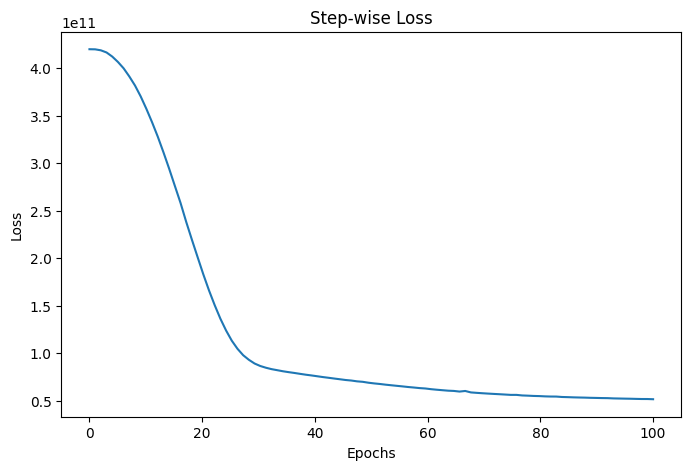

In [6]:
from matplotlib import pyplot as plt

step = np.linspace(0, 100, 100)

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()